# Cargando y conociendo el dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install -r /work/requirements.txt

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
df = pd.read_csv('/work/Hotel Reservations.csv')

## Sobre el dataset:
Este dataset contiene reservaciones de hotel y caracteristicas de esta las cuales tienen como objetivo conocer cuando un cliente va a cancelar o conservar la reservación.

El dataset está caracterizado por 19 variables y 36.275 filas organizadas de la siguiente manera:

## variables

- Booking_ID: Identificador de la reservación
- no_of_aduls: Número de adultos 
- no_of_childrens: Número de niños
- no_of_weekends_nights: Número de noches sabado y domingo
- no_of_week_nights: Número de noches entre semana
- type_of_meal_plan: Tipo de comida incluida para la reservación
- required_car_parking_space: Sí requiere parqueadero para carro
- room_type_reserved: Tipo de habitación reservada
- lead_time: Tiempo entre la reservación y la llegada al hotel
- arrival_year: Año de llegada
- arrival_month: Mes de llegada
- arrival_date: Fecha de llegada
- market_segment_type: Tipo de cliente o venta
- repeated_guest: Cliente habitual
- no_of_previous_cancellations: Número de cancelaciones previas
- no_of_previous_bookings_not_canceled: Número de reservas previas no canceladas
- avg_price_per_room: Promedio de precio por habitación
- no_of_special_requests: Número de pedidos especiales
- booking_status: Estado de la reserva 

### Target: booking_status

In [4]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
df.dtypes.value_counts()

int64      13
object      5
float64     1
dtype: int64

In [7]:
my_dict = {}

for i in df.columns:
    my_dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(my_dict,index=['unique']).T

,unique
Booking_ID,36275
no_of_adults,5
no_of_children,6
no_of_weekend_nights,8
no_of_week_nights,18
type_of_meal_plan,4
required_car_parking_space,2
room_type_reserved,7
lead_time,352
arrival_year,2


# Limpieza de datos

## Valores nulos

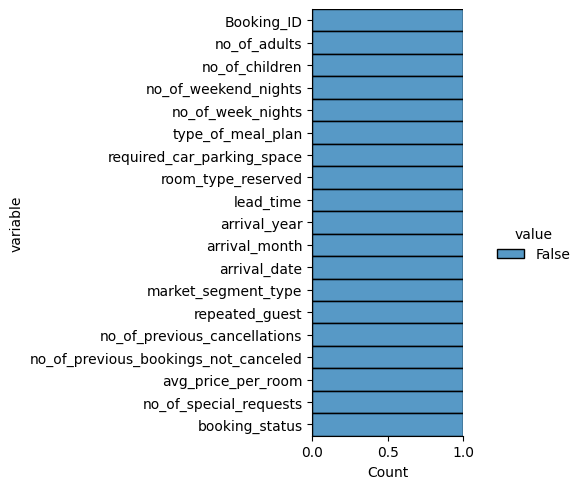

In [8]:
df.isnull().melt().pipe(lambda df: sns.displot(
    data=df,
    y='variable',
    hue='value',
    multiple='fill'
))
plt.show()

In [9]:
df_object = df.copy()
df_object = df_object.select_dtypes(exclude=['int64','float64'])

## Cambiando valores a numericos y creando nuevas columnas

In [10]:
df_numeric= df.copy()
#Target booking status cancel = 1 not cancel = 0 
df_numeric['booking_status'] = df_numeric['booking_status'].replace(['Not_Canceled','Canceled'],[0,1])

#Tipo de habitacion 
df_numeric['room_type_reserved'] = df_numeric['room_type_reserved'].replace(
    ['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'],
    [1,4,2,6,5,7,3]
)

#Market_segmentent_type to numbers
df_numeric['market_segment_type'] = df_numeric['market_segment_type'].replace(
    ['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
    [1,2,3,4,5]
)

#type_of_meal to numeric
df_numeric['type_of_meal_plan'] = df_numeric['type_of_meal_plan'].replace(
    ['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
    [1,0,2,3]
)

#Total de personas 
df_numeric['all_people'] = df_numeric['no_of_adults'] + df_numeric['no_of_children']

#remove id

df_numeric.drop('Booking_ID',axis=1,inplace=True)

## Target

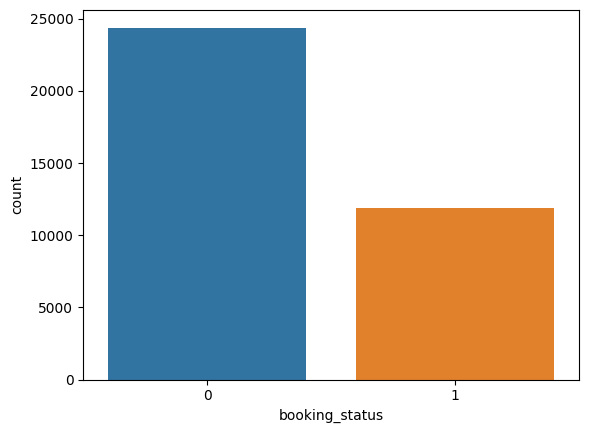

In [11]:
sns.countplot(df_numeric,x='booking_status')
plt.show()

## Under sampling

In [12]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)


In [13]:
x = df_numeric.drop('booking_status',axis=1)
y= df_numeric['booking_status']

In [14]:
x_under, y_under = undersampler.fit_resample(x,y)

In [15]:
y_plot = pd.DataFrame(y_under.value_counts())
print(x_under.shape,y_under.shape)
print(y_under.value_counts())

(23770, 18) (23770,)
0    11885
1    11885
Name: booking_status, dtype: int64


<AxesSubplot: >

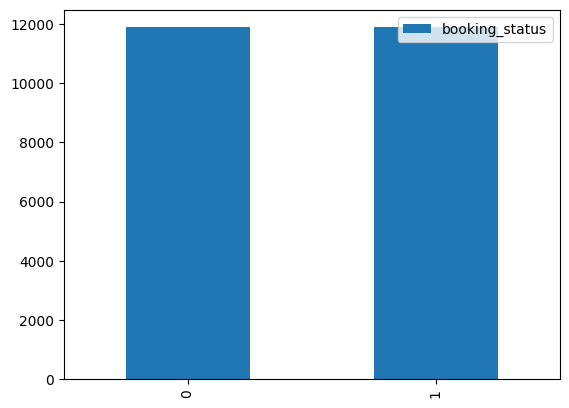

In [16]:
y_plot.plot(kind='bar')

In [17]:
df_under = x_under.copy()
df_under['booking_status'] = y_under.copy()
df_under

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,all_people,booking_status
0,2,0,0,2,1,0,1,34,2017,10,16,2,0,0,0,104.85,0,2,0
1,2,0,0,4,1,1,4,19,2018,7,5,2,0,0,0,175.00,2,2,0
2,2,0,0,1,2,0,1,55,2018,4,6,1,0,0,0,104.00,0,2,0
3,2,0,2,1,1,1,4,73,2018,8,6,2,0,0,0,140.40,2,2,0
4,1,0,0,1,1,0,4,27,2018,5,18,2,0,0,0,120.12,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23765,2,0,1,0,0,0,1,49,2018,7,11,2,0,0,0,93.15,0,2,1
23766,1,0,0,3,1,0,1,166,2018,11,1,1,0,0,0,110.00,0,1,1
23767,2,2,0,1,1,0,6,0,2018,10,6,2,0,0,0,216.00,0,4,1
23768,2,0,1,3,1,0,1,228,2018,10,17,2,0,0,0,90.95,2,2,1


## Over sampling 

In [18]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
# x = df_numeric.drop('booking_status',axis=1)
# y = df_numeric['booking_status']
x_over, y_over = oversampler.fit_resample(x,y)


In [19]:
print(x_over.shape,y_over.shape)

(48780, 18) (48780,)


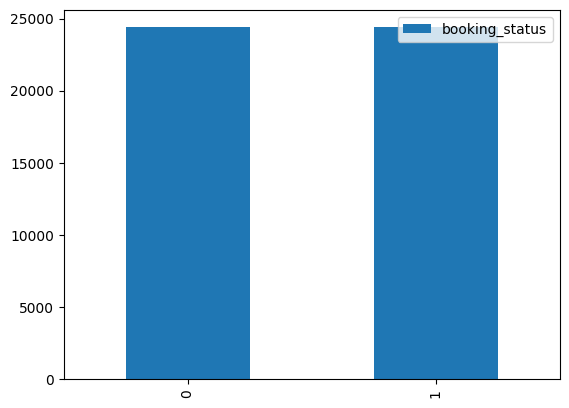

In [20]:
y_over_plot = pd.DataFrame(y_over.value_counts())
y_over_plot.plot(kind='bar')
plt.show()

In [21]:
df_over = x_over.copy()
df_over['booking_status'] = y_over
df_over

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,all_people,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,1,0,0,0,65.00,0,2,0
1,2,0,2,3,0,0,1,5,2018,11,6,2,0,0,0,106.68,1,2,0
2,1,0,2,1,1,0,1,1,2018,2,28,2,0,0,0,60.00,0,1,1
3,2,0,0,2,1,0,1,211,2018,5,20,2,0,0,0,100.00,0,2,1
4,2,0,1,1,0,0,1,48,2018,4,11,2,0,0,0,94.50,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48775,3,0,1,0,1,0,4,58,2018,3,28,2,0,0,0,123.30,0,3,1
48776,2,0,2,3,1,0,1,268,2018,4,8,1,0,0,0,78.00,0,2,1
48777,2,0,0,2,0,0,1,239,2018,10,28,2,0,0,0,85.50,0,2,1
48778,2,0,1,1,0,0,1,24,2018,9,26,2,0,0,0,107.10,0,2,1


# Exploracion de datos 

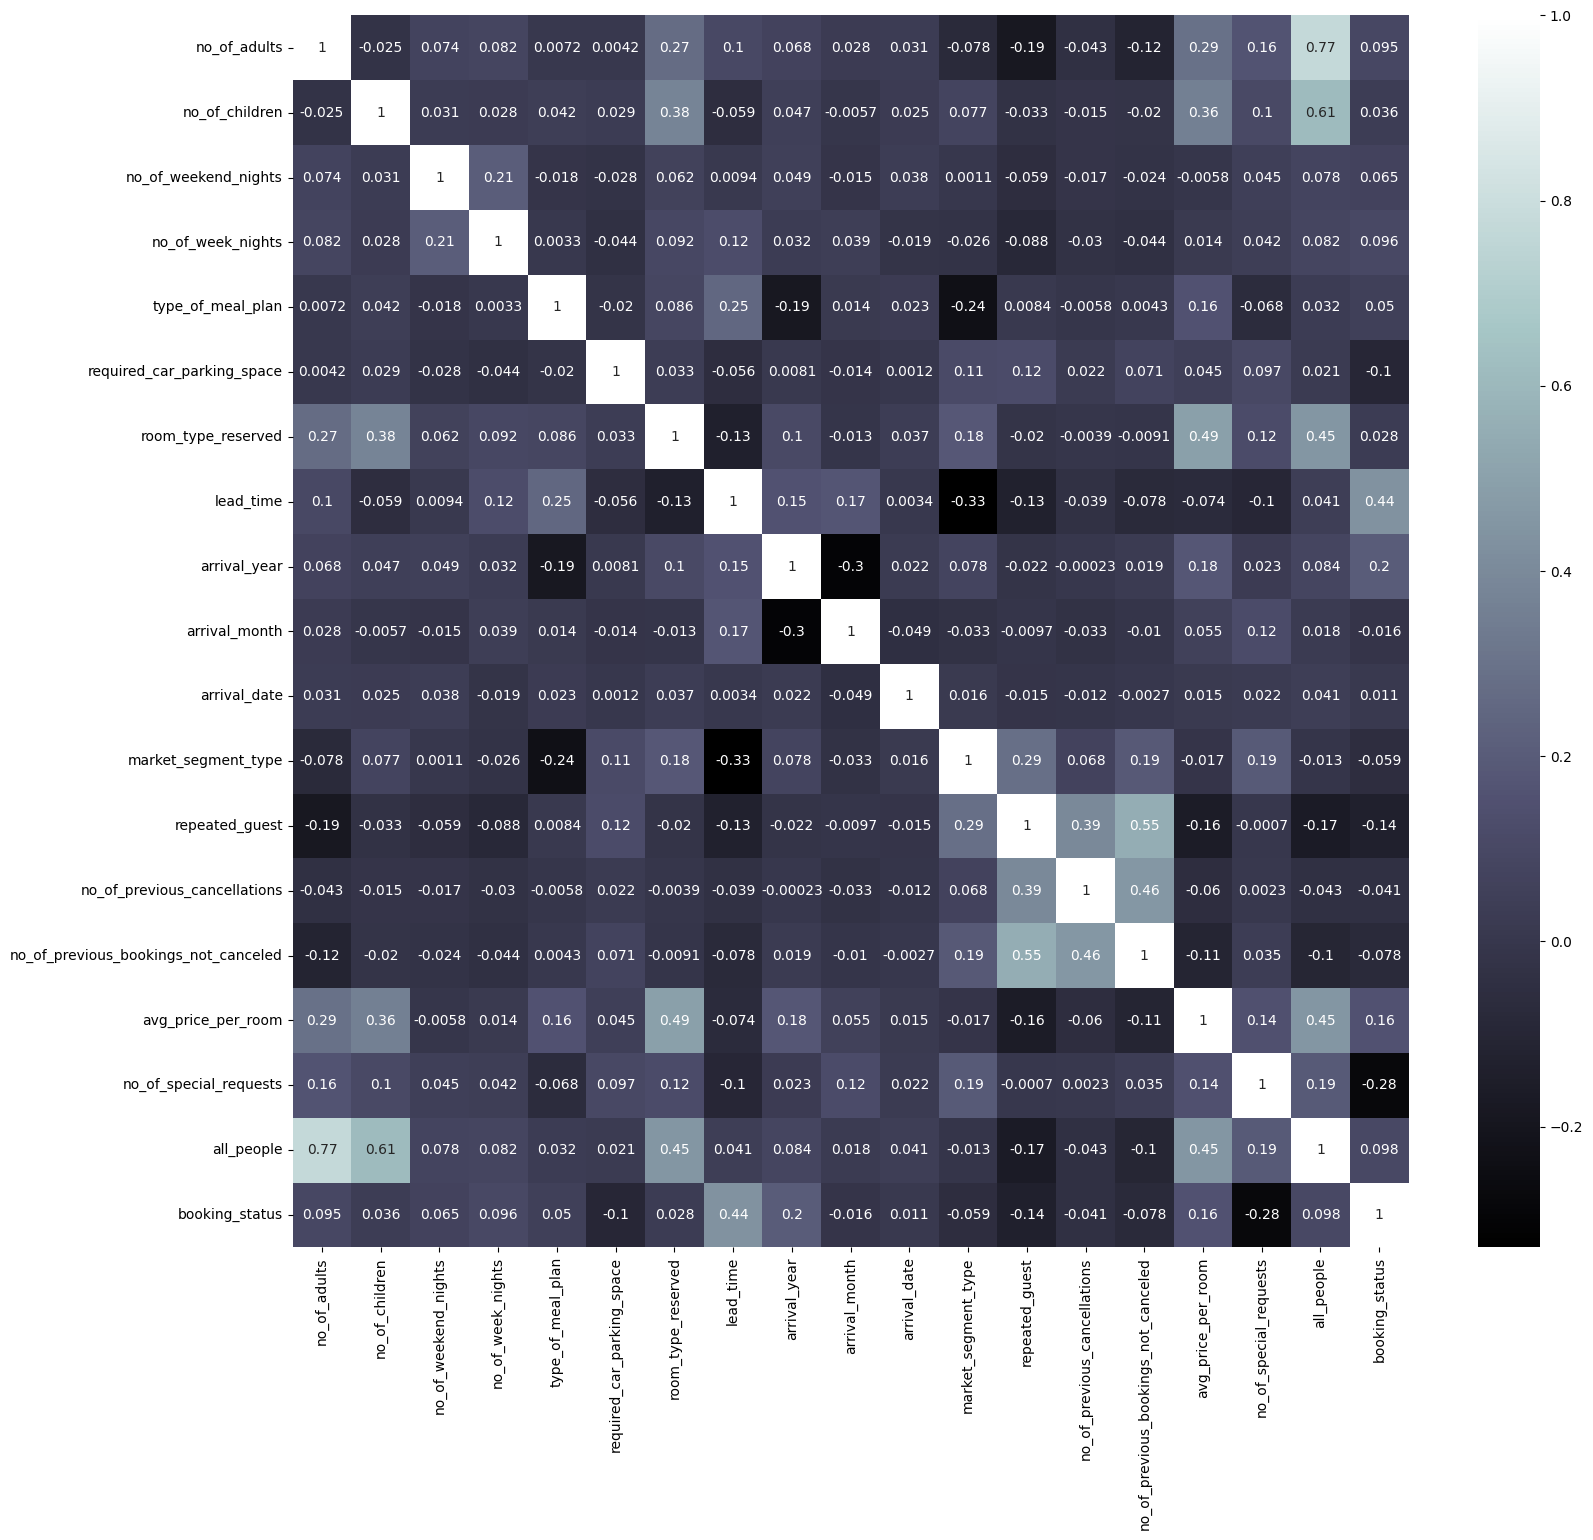

In [22]:
plt.figure(figsize=(18,16))
sns.heatmap(df_under.corr(),annot=True,cmap='bone')
plt.show()

<AxesSubplot: >

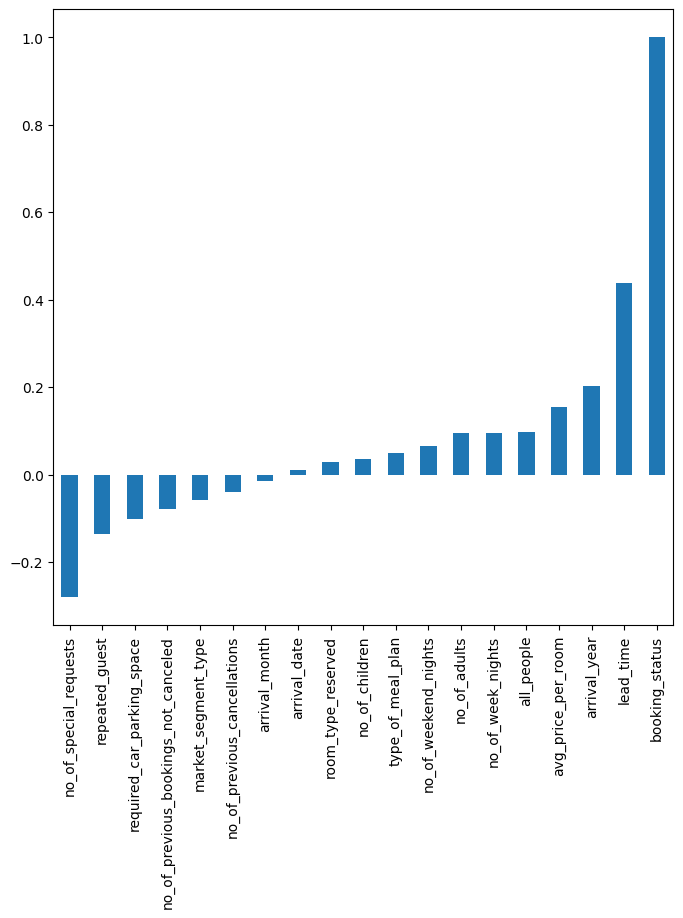

In [23]:
plt.figure(figsize=(8,8))
df_under.corr()['booking_status'].sort_values(ascending=True).plot(kind='bar')

# Escalamiento

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ss = StandardScaler()


In [25]:
df_under_scaled = ss.fit_transform(df_under.drop('booking_status',axis=1))
df_under_scaled = pd.DataFrame(df_under_scaled)
df_under_scaled['booking_status'] = df_under['booking_status']
df_under_scaled.columns = df_under.columns


In [26]:
df_over_scaled = ss.fit_transform(df_over.drop('booking_status',axis=1))
df_over_scaled = pd.DataFrame(df_over_scaled)
df_over_scaled['booking_status'] = df_over['booking_status']
df_over_scaled.columns = df_over.columns

In [27]:
# df_under_scaled

In [28]:
# df_over_scaled

# Analisis exploratorio

In [29]:
df.drop('Booking_ID',axis=1).select_dtypes(include='object').columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

In [53]:
var_importants = ['lead_time','arrival_year','avg_price_per_room','no_of_special_requests']

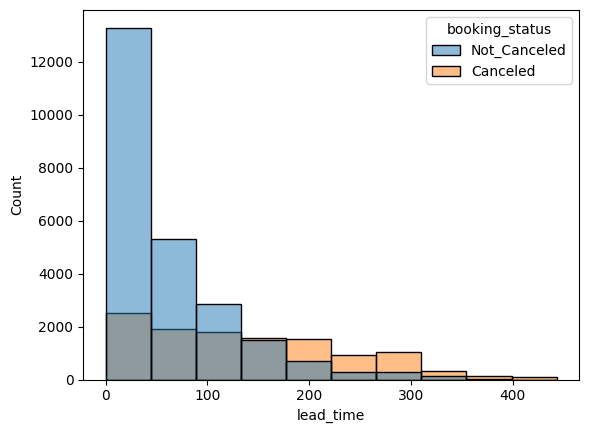

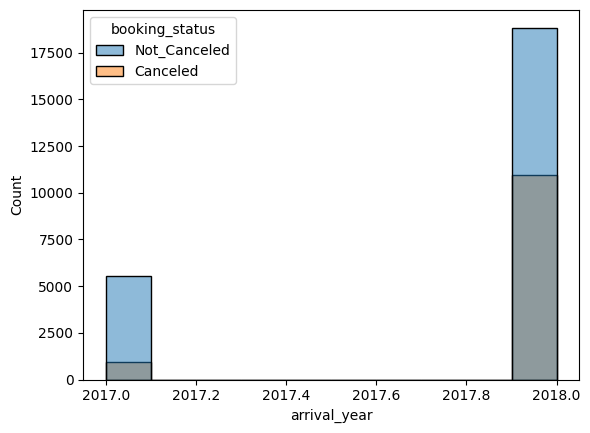

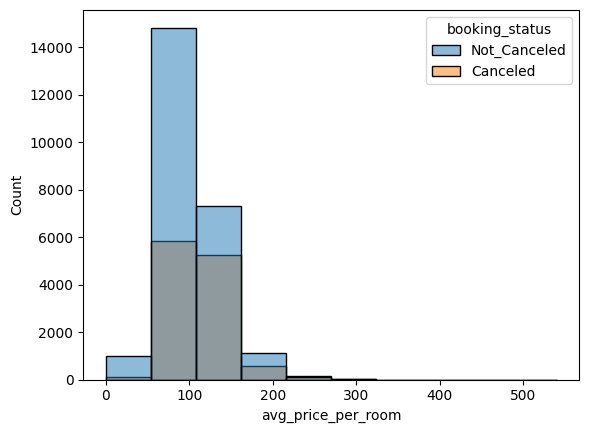

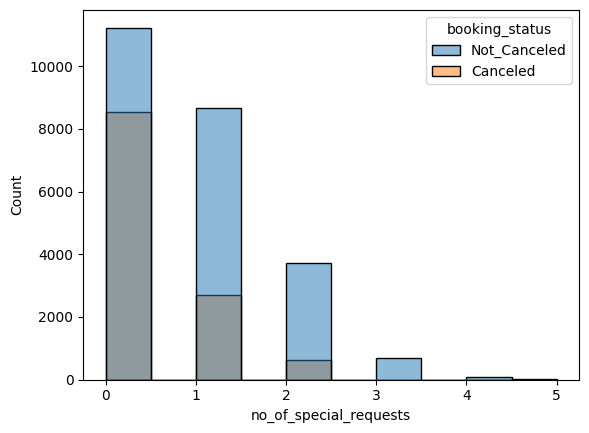

In [55]:
for i in var_importants:
    sns.histplot(data=df,x=i,hue='booking_status',bins=10)
    plt.show()

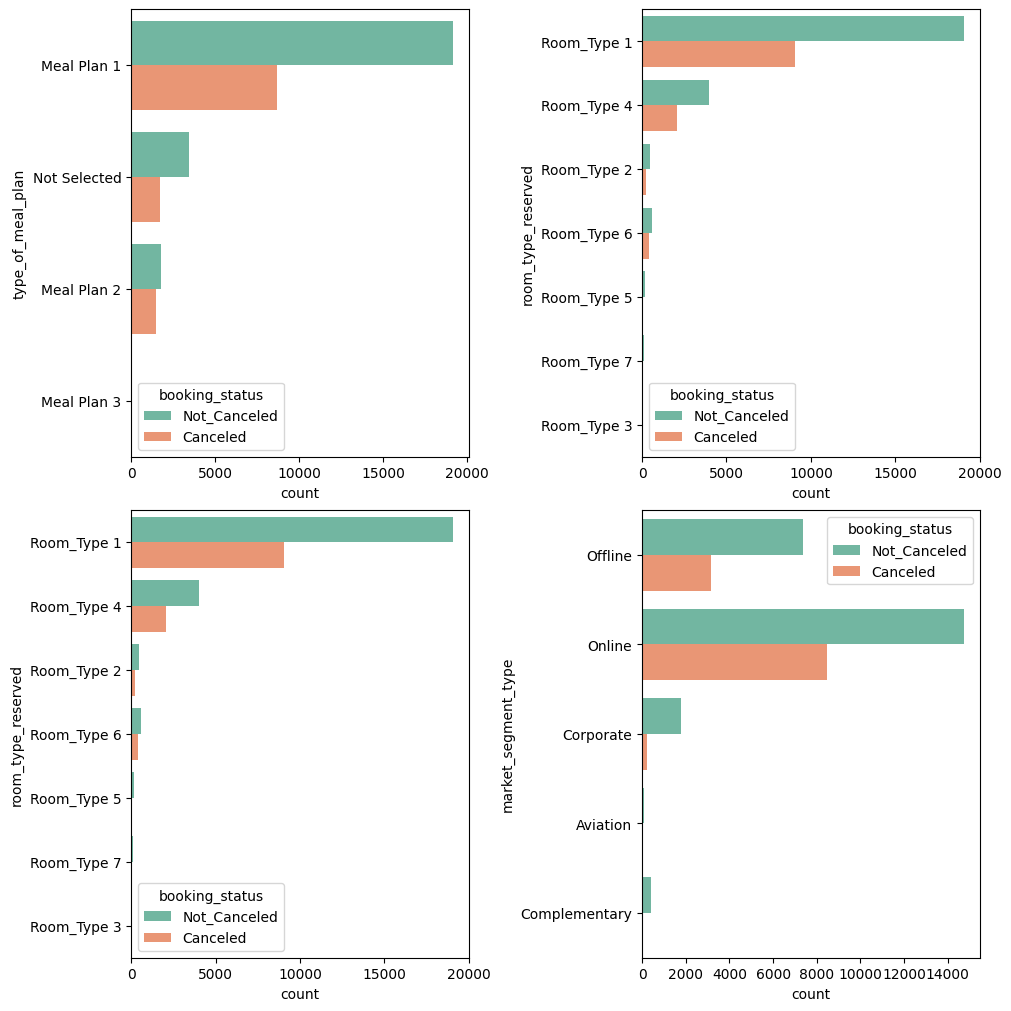

In [31]:
cat_cols = df.drop('Booking_ID',axis=1).select_dtypes(include='object').columns
rows = 2
cols = 2
fig, ax = plt.subplots(rows,cols, figsize=(10,10), constrained_layout=True)
for i in range(rows):
    for j in range(cols):
        title = cat_cols[i+j]
        # print(title)
        # print(i+j)
        sns.countplot(
            data=df,
            y=title,
            hue='booking_status',
            ax=ax[i,j],
            palette='Set2',
        )

# Modelo

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

## Df_over

### entrenamiento

In [33]:
x = df_over_scaled.drop('booking_status',axis=1)
y= df_over_scaled['booking_status']

In [34]:
xover_train, xover_test, yover_train, yover_test = train_test_split(
    x,
    y,
    test_size=.3,
    random_state=42
    )

In [35]:
print('xover_train',xover_train.shape,'yover_train',yover_train.shape)
print('xover_test',xover_test.shape,'yover_test',yover_test.shape)

xover_train (34146, 18) yover_train (34146,)
xover_test (14634, 18) yover_test (14634,)


In [36]:
model_over = LogisticRegression()
model_over.fit(xover_train,yover_train)

LogisticRegression()

In [37]:
prediction_over = model_over.predict(xover_test)
print(accuracy_score(yover_test,prediction_over))

0.7699876998769988


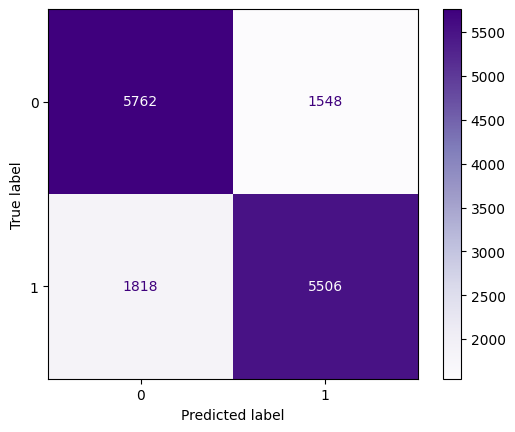

In [38]:
cm = confusion_matrix(yover_test,prediction_over,labels=model_over.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_over.classes_)
disp.plot(cmap='Purples')
plt.show()

## df_under

In [41]:
x = df_under_scaled.drop('booking_status',axis=1)
y = df_under_scaled['booking_status']

In [42]:
xunder_train,xunder_test,yunder_train,yunder_test = train_test_split(
    x,
    y,
    test_size=.3,
    random_state=42
    )

In [43]:
print('xunder_train',xunder_train.shape,'yunder_train',yunder_train.shape)
print('xunder_test',xunder_test.shape,'yunder_test',yunder_test.shape)

xunder_train (16639, 18) yunder_train (16639,)
xunder_test (7131, 18) yunder_test (7131,)


In [44]:
model_under = LogisticRegression()
model_under.fit(xunder_train,yunder_train)

LogisticRegression()

In [45]:
prediction_under = model_under.predict(xunder_test)
print(accuracy_score(yunder_test,prediction_under))

0.769036600757257


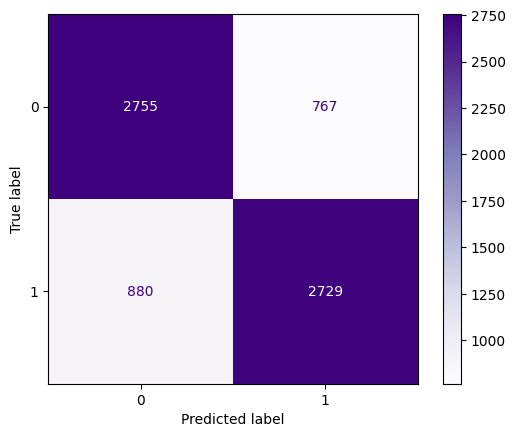

In [46]:
cm_under = confusion_matrix(yunder_test,prediction_under,labels=model_under.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_under,display_labels=model_under.classes_)
disp.plot(cmap='Purples')
plt.show()

- Vemos que no es mucha la diferencia haciendo un over sampling o under sampling en el modelo.

- Por ello, preferiría el modelo con under sampling ya que son datos que no han sido creados a partir de otros, como si es el caso del over samplig.

- Las principales variables que influyen en la cancelación de la reserva es el lead-time y arrival year. Lo más recomedable es reducir el leadtime en las reservaciones.

- Cuando hay servicios especiales se reduce mucho la cancelación de la reserva, sería un gran acierto ampliar los servicios especiales para tener más clientes fieles.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b6a707cb-6265-4509-9662-327003959035' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>